In [ ]:
# Oğuzhan Deniz
import pandas as pd
import numpy as np
from random import shuffle


def split_data(data, test_ratio):
  # Calculate length of test part and shuffle dataset
  test_len = int(test_ratio * len(data))
  shuffle(data)

  # Split predictor (train) and validation (test) parts of dataset
  X_predictor, y_predictor = data[test_len:, :-1], data[test_len:, -1]
  X_validation, y_validation = data[:test_len, :-1], data[:test_len, -1]
  return X_predictor, y_predictor, X_validation, y_validation


def normalize(arr):
  # Get the minimum and maximum values of the array using NumPy's min() and max() functions
  min_val = np.min(arr)
  max_val = np.max(arr)

  # Subtract the minimum value from the array and divide by the range using NumPy's subtract() and divide() functions
  return np.divide(np.subtract(arr, min_val), max_val - min_val)


def kNN(X_pred, y_pred, X_val, k):
  # Calculate Euclidean distance with matrix operations for time saving
  distances = np.sqrt(np.sum((X_pred - X_val)**2, axis=1))

  # Merge distances with corresponding personality tags (label)
  distances_zipped = sorted(zip(distances, y_pred))

  # Get k nearest neighbors from sorted distances
  nearest_neighbors = distances_zipped[:k]

  # Seperate Personality tags of closest neighbors
  tags = []
  for neighbor in nearest_neighbors:
    tags.append(neighbor[1])

  # Get the tag with the most number in the nearest neighbor list
  return max(tags, key = tags.count)


def calculate_perf_eval_metrics(predictions, y_val, num_of_classes):
  # Create confusion matrix with length of 16x16 (num_of_classes x num_of_classes)
  confusion_matrix = [[0 for i in range(num_of_classes)] for j in range(num_of_classes)]

  # Compare every prediction with real values and add result to the confusion matrix
  for pred, real in zip(predictions, y_val):
    confusion_matrix[pred][real] += 1


  print(*confusion_matrix, sep="\n", end="\n")

  acc, prec, rcl, n = 0, 0, 0, len(confusion_matrix)

  for i in range(num_of_classes):

    true_pos = confusion_matrix[i][i]  # TP = Prediction is true and correct
    false_neg = sum([row[i] for row in confusion_matrix]) - true_pos  # FN = Prediction is false but wrong (needed to be true)
    false_pos = sum(confusion_matrix[i]) - true_pos  # FP = Prediction is true but wrong (needed to be false)

    prec += true_pos / (true_pos + false_pos)  # Precision = TP / TP + FP
    rcl += true_pos / (true_pos + false_neg)  # Recall = TP / TP + FN
    acc += true_pos / (true_pos + false_pos + false_neg)  # Accuracy = TP / TP + FP + FN (but for every row, FN is being processed)

  return acc / n, prec / n, rcl / n


def predict(X_pred, y_pred, X_val, y_val, k, num_of_classes):
  predictions = []

  # Calculate predictions with/out Feature Normalization
  for test in X_val:
    prediction = kNN(X_pred, y_pred, test, k)
    predictions.append(prediction)

  # Calculate and print Performance Evaluation Metrics with/out Feature Normalization
  accuracy, precision, recall = calculate_perf_eval_metrics(predictions, y_val, num_of_classes)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  

# ------------------------- MAIN -------------------------

# Create dictionary for mapping values of Personalities
mapping = {'ESTJ': 0, 'ENTJ': 1, 'ESFJ': 2, 'ENFJ': 3, 'ISTJ': 4,
            'ISFJ': 5, 'INTJ': 6, 'INFJ': 7, 'ESTP': 8, 'ESFP': 9,
            'ENTP': 10, 'ENFP': 11, 'ISTP': 12, 'ISFP': 13, 'INTP': 14,
            'INFP': 15}
      
num_of_classes = len(mapping)

k_values = [1, 3, 5, 7, 9]  # k values for k-nearest neighbor algorithm

# Read .csv file as pandas.DataFrame
datafr = pd.read_csv("drive/MyDrive/16P.csv", encoding='cp1252')

# Drop 'Response Id' since we don't need it
datafr=datafr.drop(columns={'Response Id'})

# Map Personality values with 'mapping' dictionary we created earlier
datafr["Personality"] = datafr["Personality"].map(mapping)

# Transform pandas.DataFrame into numpy.Array
all_data = datafr.to_numpy()

# Shuffle and split dataset into predictor and validation (train and test) parts
# For test_ratio 0.2: %80 predictor, %20 test
X_predictor, y_predictor, X_validation, y_validation = split_data(all_data, 0.2)

# Calculate normalized values for predictor and validation (train and test) parts
X_pred_norm = normalize(X_predictor)
X_val_norm = normalize(X_validation)

for k in k_values:
  print("-------------------------------------\nFor k value: " + str(k))

  print("\nWithout Feature Normalization\n")
  # Call without Feature Normalization
  predict(X_predictor, y_predictor, X_validation, y_validation, k, num_of_classes)

  
  print("\nWith Feature Normalization\n")
  # Call with Feature Normalization
  predict(X_pred_norm, y_predictor, X_val_norm, y_validation, k, num_of_classes)



-------------------------------------
For k value: 1

Without Feature Normalization

[775, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 811, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 740, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[1, 0, 0, 771, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]
[0, 0, 0, 0, 759, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 693, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 758, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 5, 0, 0, 720, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 733, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 747, 0, 0, 0, 0, 6, 0]
[0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 736, 0, 1, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 729, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 763, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 772, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 722, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 694]
Accuracy: 0.9875
Precision: 0.9937
Recall: 0.9937

With Feature Normalization

[775, 0, 1, 0, 0, 1,

# ***Error Analysis for Classification***

***Explanation of Missclassified Samples***

  In 16 Personalities, every letter corresponds to a characteristic. For example, first letter I or E corresponds to Introvert or Extrovert. Here is more information about this.

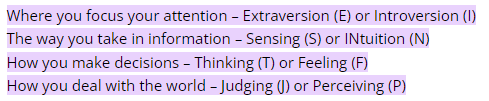

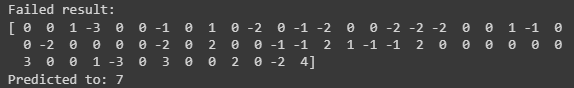

This test case is actually ISTJ, but the algorithm predicted it as INFJ. It might be failed because of answers of S-N (Sensing-Intuition) and T-F (Thinking-Feeling) questions is so close. Also, there are so many 0 (Neutral) in answers, this is a problem too in classification.

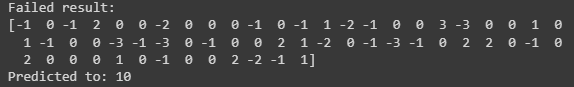


This test case is actually ENTJ, but the algorithm predicted it as ENTP. It might be failed because of answers of J-P (Judging-Perceiving) questions is so close. These are close personalities, two personalities are both Analysts. Again, there are so many 0 (Neutral) in answers, this is a problem too in classification.



***RESULTS***

---

**For k value: 1**

---

**Without Feature Normalization**

Accuracy: 0.9875

Precision: 0.9937

Recall: 0.9937

.

**With Feature Normalization**

Accuracy: 0.9875

Precision: 0.9937

Recall: 0.9937

---

---

**For k value: 3**

---

**Without Feature Normalization**

Accuracy: 0.9835

Precision: 0.9917

Recall: 0.9917

.


**With Feature Normalization**

Accuracy: 0.9830

Precision: 0.9914

Recall: 0.9914

---

---

**For k value: 5**

---

**Without Feature Normalization**

Accuracy: 0.9790

Precision: 0.9893

Recall: 0.9894

.

**With Feature Normalization**

Accuracy: 0.9788

Precision: 0.9893

Recall: 0.9893

---

---

**For k value: 7**

---

**Without Feature Normalization**

Accuracy: 0.9793

Precision: 0.9895

Recall: 0.9896

.

**With Feature Normalization**

Accuracy: 0.9791

Precision: 0.9894

Recall: 0.9895

---

---

**For k value: 9**

---

**Without Feature Normalization**

Accuracy: 0.9776

Precision: 0.9886

Recall: 0.9887

.

**With Feature Normalization**

Accuracy: 0.9780

Precision: 0.9888

Recall: 0.9889

---


***COMMENTS ON RESULTS***

*   Increasing the value of k (the number of neighbors considered) generally leads to a decrease in the model's accuracy and precision, while recall remains relatively stable. This is because a larger value of k means that the model is considering more neighbors when making a prediction, which can smooth out any noise in the data but may also lead to a less precise model.
*   Feature normalization, does not appear to have a remarkable effect on the model's performance in this case. There is very slight differences in results. Some of them has positive effect, some has negative effect on result.
*   The K-Nearest Neighbor Algorithm (KNN) perform consistently across different values of k and with/without feature normalization according to the results.
*   Overall, the model seems to have a high accuracy (around 98%), with a slightly higher precision than recall. This suggests that the model is good at correctly identifying positive examples, but may be less effective at identifying negative examples.

  In terms of accuracy, precision, and recall:
*   High accuracy means that the model is correctly classifying a high percentage of the data.
*   High precision means that the model is correctly identifying a high percentage of positive cases.
*   High recall means that the model is correctly identifying a high percentage of all positive cases in the data.

As a result, the k value of 1 has the highest accuracy, precision, and recall among the different combinations tested.







